# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import IPython.display as ipd

In [3]:
from matplotlib.pyplot import specgram

In [4]:
import librosa
import librosa.display

# Loading Prepared Dataset (CSV-file)

In [5]:
File = pd.read_csv("/content/drive/MyDrive/Project/DataSet/Balanced_Dataset_Details.csv")

In [6]:
File.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/Project/DataSet/RAVDEES...
1,sad,/content/drive/MyDrive/Project/DataSet/RAVDEES...
2,sad,/content/drive/MyDrive/Project/DataSet/RAVDEES...
3,calm,/content/drive/MyDrive/Project/DataSet/RAVDEES...
4,happy,/content/drive/MyDrive/Project/DataSet/RAVDEES...


In [7]:
# Happy Emotion
ipd.Audio(File["Path"][4])

In [8]:
# Sad Emotion
ipd.Audio(File["Path"][1])

### Create WavePlot

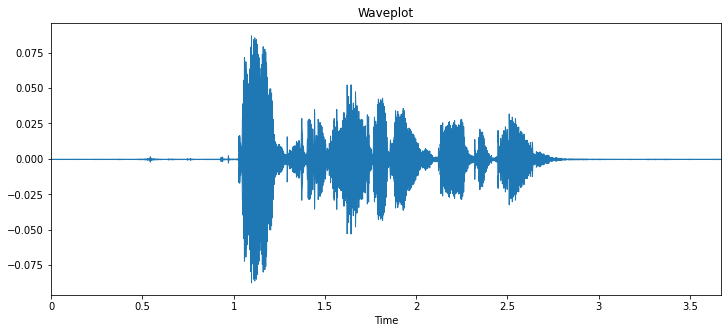

In [9]:
data, sr = librosa.load(File["Path"][1])
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot')

# Audio 
ipd.Audio(File["Path"][1])

### CREATE LOG MEL SPECTROGRAM

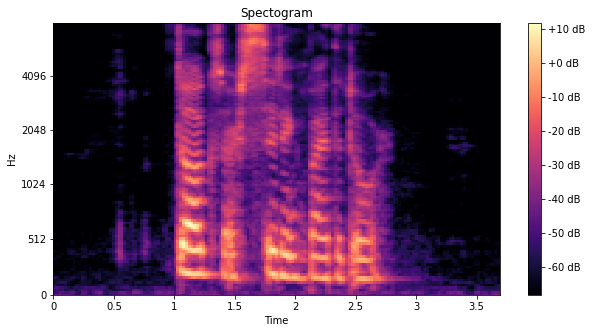

In [10]:
data, sr = librosa.load(File["Path"][1])

plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Spectogram')
plt.colorbar(format='%+2.0f dB');

### Create MFCC (Mel Frequency Cepstral Coefficients) feature

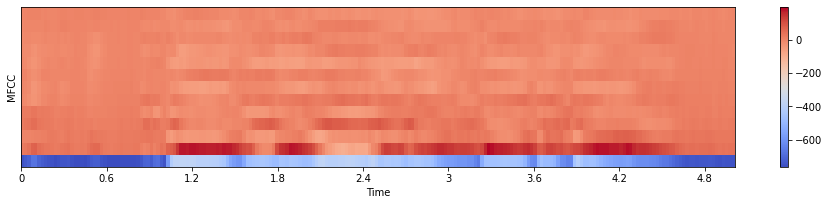

In [11]:
X, sample_rate = librosa.load(File["Path"][1], res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Extracting features (melspectrogram)




In [12]:
data, sample_rate = librosa.load(File["Path"][1], duration=2.5, offset=0.6)

In [13]:
res1 = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

In [14]:
res1                       # Features

array([5.22671035e-05, 1.18159463e-04, 1.79949900e-04, 4.00897727e-04,
       8.91781237e-04, 3.30791175e-02, 1.49233714e-01, 2.58785307e-01,
       2.33824477e-01, 2.87440903e-02, 6.62797969e-03, 5.72780706e-03,
       5.25548682e-02, 1.03245653e-01, 1.55706093e-01, 1.89760864e-01,
       3.52053851e-01, 2.02516779e-01, 2.00713605e-01, 1.19958639e-01,
       6.01161942e-02, 2.75656730e-02, 2.88410075e-02, 5.90277500e-02,
       2.97235698e-01, 3.36788595e-01, 8.83694962e-02, 9.14634764e-03,
       7.36494549e-03, 2.84699327e-03, 7.78023503e-04, 1.25597196e-03,
       2.06127390e-02, 2.73854174e-02, 7.71095371e-03, 2.01374711e-03,
       5.41721587e-04, 3.81681515e-04, 4.92059567e-04, 1.32005860e-03,
       6.63226470e-03, 9.22997482e-03, 4.68638120e-03, 5.02696377e-04,
       2.97869410e-04, 3.47915164e-04, 4.44188161e-04, 7.01355841e-03,
       1.48014957e-02, 1.47896828e-02, 3.72026581e-03, 1.55276270e-03,
       7.05440936e-04, 1.35700847e-03, 1.55968568e-03, 1.60152640e-03,
      

In [15]:
File["Emotions"][1]               # Label

'sad'

# Extracting features (Mel Frequency Cepstral Coefficients)



In [16]:
data, sample_rate = librosa.load(File["Path"][1], duration=2.5, offset=0.6)

In [17]:
res1 = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

In [18]:
res1                     # Features

array([-5.2664374e+02,  7.3350288e+01,  1.3874455e+01,  1.5935945e+01,
        4.2520289e+00, -5.3567667e+00, -1.3511012e+01, -2.2791101e+01,
       -3.9366014e+00, -3.6884902e+00, -1.3325190e+01, -3.5136509e+00,
       -1.7092472e-01, -5.3367276e+00,  1.0034680e+00, -3.5684676e+00,
       -5.8211026e+00, -3.6203918e+00, -4.7710071e+00, -3.1855195e+00],
      dtype=float32)

In [19]:
File["Emotions"][1]               # Label

'sad'

# Data Augmentation
## Noise, Stretch, Pitch

In [20]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [21]:
# Trying different functions
path = np.array(File['Path'])[3]
data, sample_rate = librosa.load(path)

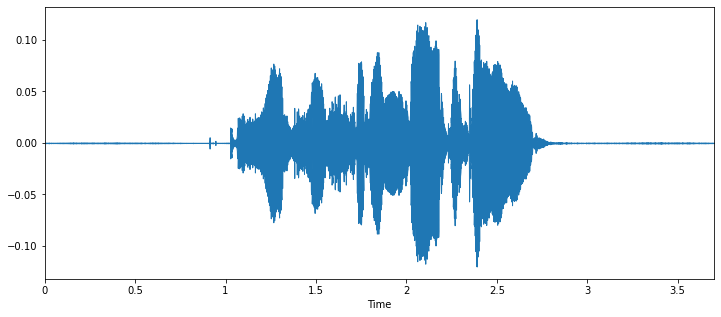

In [22]:
# Normal Audio
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sample_rate)
ipd.Audio(path)

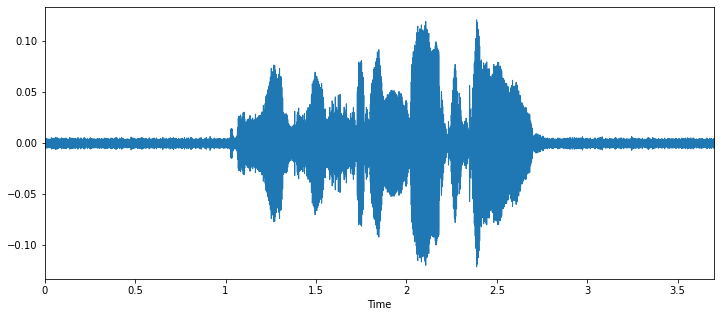

In [23]:
# Noise
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

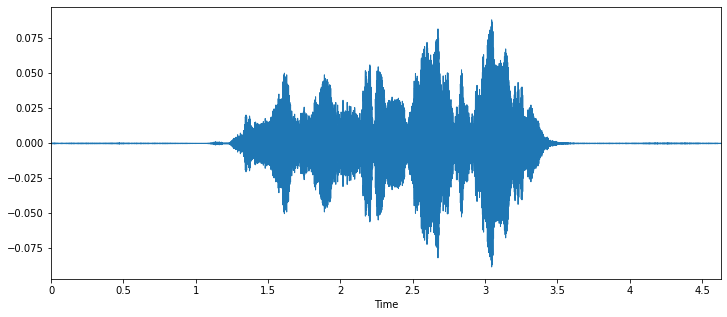

In [24]:
# Stretch
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

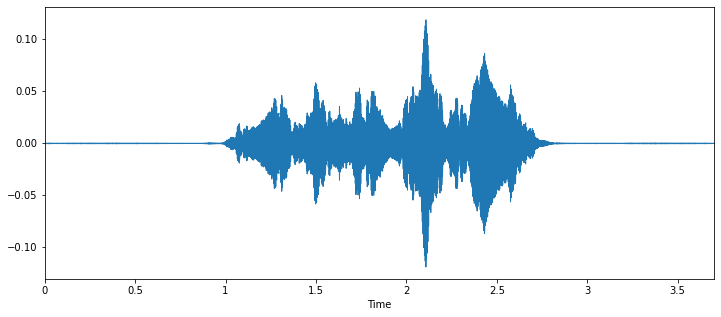

In [25]:
# Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Melspectrogram

In [26]:
def feat_ext_spect(data):
    mfcc = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat_spect(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext_spect(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext_spect(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext_spect(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [27]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature = get_feat_spect(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

Features_Melspectrogram = pd.DataFrame(X)
Features_Melspectrogram['labels'] = Y
Features_Melspectrogram.to_csv('/content/drive/MyDrive/Project/Outputs/Features_Melspectrogram.csv', index=False)
Features_Melspectrogram.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,labels
0,0.000056,0.000195,0.000281,0.000119,0.000119,0.003826,0.215466,0.779309,1.186640,0.456590,0.264733,0.059279,0.008015,0.056756,0.189301,0.117717,0.219477,0.354321,0.470733,0.321788,0.057423,0.140328,0.065448,0.071429,0.141763,0.310317,0.195954,0.022601,0.021112,0.009388,0.003168,0.009134,0.039574,0.030848,0.252551,0.172249,0.015017,0.010310,0.002157,0.005150,...,0.000508,0.000362,0.000221,0.000292,0.000601,0.001480,0.002688,0.001515,0.001576,0.001867,0.001936,0.000985,0.001203,0.001034,0.000417,0.000364,0.000315,0.000503,0.000334,0.000287,0.000333,0.000280,0.000181,0.000123,0.000391,0.000404,0.000245,0.000268,0.000198,0.000180,0.000135,0.000309,0.000234,0.000308,0.000412,0.000274,0.000244,0.000089,7.960429e-06,calm
1,0.000424,0.000584,0.000703,0.000441,0.000512,0.004222,0.215826,0.783251,1.191611,0.458635,0.263796,0.059964,0.008427,0.057091,0.189452,0.118366,0.219922,0.355746,0.471977,0.323959,0.057482,0.140575,0.065339,0.072197,0.141416,0.309443,0.194756,0.022700,0.021859,0.009827,0.003579,0.009670,0.041067,0.031037,0.252620,0.174396,0.015310,0.010764,0.002521,0.005600,...,0.000897,0.000760,0.000595,0.000616,0.000981,0.001876,0.002960,0.001959,0.001888,0.002191,0.002248,0.001436,0.001601,0.001381,0.000761,0.000760,0.000677,0.000875,0.000681,0.000631,0.000714,0.000671,0.000543,0.000465,0.000785,0.000818,0.000639,0.000646,0.000556,0.000538,0.000502,0.000671,0.000587,0.000645,0.000760,0.000670,0.000602,0.000464,3.621760e-04,calm
2,0.000012,0.000048,0.000069,0.000038,0.000026,0.000213,0.008568,0.090721,0.256162,0.167146,0.087384,0.045327,0.003557,0.002158,0.015868,0.017591,0.028459,0.062606,0.108183,0.167586,0.174598,0.013100,0.037658,0.014813,0.024528,0.040470,0.041385,0.044612,0.006145,0.003457,0.002393,0.000307,0.001117,0.004505,0.007195,0.012121,0.041407,0.011300,0.002210,0.000566,...,0.000156,0.000122,0.000143,0.000047,0.000039,0.000076,0.000090,0.000662,0.000500,0.000303,0.000369,0.000362,0.000246,0.000228,0.000310,0.000152,0.000078,0.000074,0.000101,0.000079,0.000038,0.000070,0.000065,0.000060,0.000031,0.000064,0.000151,0.000075,0.000039,0.000045,0.000035,0.000024,0.000030,0.000046,0.000069,0.000080,0.000048,0.000012,6.144732e-07,calm
3,0.000052,0.000118,0.000180,0.000401,0.000892,0.033079,0.149234,0.258785,0.233824,0.028744,0.006628,0.005728,0.052555,0.103246,0.155706,0.189761,0.352054,0.202517,0.200714,0.119959,0.060116,0.027566,0.028841,0.059028,0.297236,0.336789,0.088369,0.009146,0.007365,0.002847,0.000778,0.001256,0.020613,0.027385,0.007711,0.002014,0.000542,0.000382,0.000492,0.001320,...,0.000513,0.000865,0.001756,0.003663,0.002064,0.001435,0.001094,0.000726,0.000459,0.000430,0.000395,0.000418,0.000413,0.000761,0.000715,0.000880,0.002142,0.003626,0.003580,0.001510,0.000360,0.000360,0.000959,0.002340,0.003106,0.003639,0.002998,0.002134,0.001123,0.000732,0.000980,0.001343,0.001137,0.001100,0.000719,0.000647,0.000472,0.000144,1.405638e-05,sad
4,0.000141,0.000191,0.000279,0.000487,0.001053,0.033251,0.149885,0.259174,0.233391,0.028337,0.006654,0.005853,0.052331,0.102704,0.155506,0.189508,0.352488,0.202697,0.200505,0.120420,0.060202,0.027337,0.028592,0.059378,0.297827,0.338870,0.088914,0.009159,0.007353,0.002873,0.000823,0.001371,0.020917,0.027377,0.007786,0.002162,0.000661,0.000462,0.000584,0.001424,...,0.000587,0.000975,0.001875,0.003771,0.002172,0.001601,0.001215,0.000834,0.000554,0.000531,0.000506,0.000531,0.000505,0.000839,0.000774,0.000976,0.002227,0.003735,0.003712,0.001651,0.000469,0.000453,0.001049,0.002422,0.003216,0.003798,0.003118,0.002214,0.001228,0.000857,0.001095,0.001461,0.001220,0.001213,0.000805,0.000752,0.000569,0.000242,1.137231e-04,sad


### MFCC (Mel Frequency Cepstral Coefficients)

In [29]:
def feat_ext_mfcc(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat_mfcc(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext_mfcc(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext_mfcc(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext_mfcc(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [30]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature = get_feat_mfcc(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

Features_MFCC = pd.DataFrame(X)
Features_MFCC['labels'] = Y
Features_MFCC.to_csv('/content/drive/MyDrive/Project/Outputs/Features_MFCC.csv', index=False)
Features_MFCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,labels
0,-474.689087,75.231674,-10.374255,12.529942,0.073396,-13.048629,-13.001050,-21.484741,-9.517821,-7.738400,0.519264,-11.354362,-7.726419,1.593689,-9.145521,-0.212657,-6.929526,-4.322876,-4.710403,-8.351056,calm
1,-382.419387,37.087711,1.615529,3.683603,-1.183136,-6.143566,-12.541712,-13.057688,-7.683357,-5.130746,-3.137836,-9.232100,-6.580509,-1.695183,-5.766060,-3.645537,-5.966587,-4.921962,-4.729661,-7.014927,calm
2,-531.291626,69.793022,-10.776010,11.183795,-4.748435,-11.032655,-19.019123,-21.966667,-10.927226,-4.860693,-0.388479,-13.176809,-3.879907,-0.284960,-9.416859,0.278055,-8.788507,-4.630785,-7.198601,-8.594221,calm
3,-526.643738,73.350288,13.874455,15.935945,4.252029,-5.356767,-13.511012,-22.791101,-3.936601,-3.688490,-13.325190,-3.513651,-0.170925,-5.336728,1.003468,-3.568468,-5.821103,-3.620392,-4.771007,-3.185519,sad
4,-361.321357,21.890735,12.978506,7.077661,0.872682,-1.993552,-9.888847,-11.654353,-6.989728,-4.968531,-7.121045,-2.849035,-2.053199,-2.680717,-1.212118,-2.685285,-3.987687,-2.573485,-3.843988,-4.138587,sad


### MelSpectogram + MFCC

In [31]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature_Melspectrogram = get_feat_spect(path)
    feature_MFCC = get_feat_mfcc(path)
    res = np.concatenate((feature_Melspectrogram, feature_MFCC), axis=1) 
    for ele in res:
        X.append(ele)
        Y.append(emotion)

Features_Combined = pd.DataFrame(X)
Features_Combined['labels'] = Y
Features_Combined.to_csv('/content/drive/MyDrive/Project/Outputs/Features_Combined.csv', index=False)
Features_Combined.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,labels
0,0.000056,0.000195,0.000281,0.000119,0.000119,0.003826,0.215466,0.779309,1.186640,0.456590,0.264733,0.059279,0.008015,0.056756,0.189301,0.117717,0.219477,0.354321,0.470733,0.321788,0.057423,0.140328,0.065448,0.071429,0.141763,0.310317,0.195954,0.022601,0.021112,0.009388,0.003168,0.009134,0.039574,0.030848,0.252551,0.172249,0.015017,0.010310,0.002157,0.005150,...,0.000333,0.000280,0.000181,0.000123,0.000391,0.000404,0.000245,0.000268,0.000198,0.000180,0.000135,0.000309,0.000234,0.000308,0.000412,0.000274,0.000244,0.000089,7.960429e-06,-474.689087,75.231674,-10.374255,12.529942,0.073396,-13.048629,-13.001050,-21.484741,-9.517821,-7.738400,0.519264,-11.354362,-7.726419,1.593689,-9.145521,-0.212657,-6.929526,-4.322876,-4.710403,-8.351056,calm
1,0.000203,0.000322,0.000439,0.000271,0.000265,0.003977,0.215628,0.776650,1.184454,0.458336,0.264465,0.058810,0.008123,0.057167,0.190737,0.118392,0.219696,0.353886,0.470467,0.323148,0.058125,0.140216,0.064953,0.070557,0.140589,0.311373,0.196961,0.022482,0.020980,0.009490,0.003383,0.009500,0.039559,0.030455,0.252622,0.172436,0.015379,0.010558,0.002302,0.005214,...,0.000538,0.000467,0.000350,0.000299,0.000565,0.000597,0.000413,0.000449,0.000353,0.000329,0.000292,0.000474,0.000395,0.000485,0.000587,0.000441,0.000419,0.000262,1.804906e-04,-417.093766,47.791839,-1.807894,5.463393,-0.857283,-7.679819,-14.592977,-15.794567,-8.849224,-6.349883,-2.830961,-10.847643,-6.654379,-1.465691,-6.797494,-3.094689,-6.291496,-4.512487,-4.711416,-8.531783,calm
2,0.000012,0.000048,0.000069,0.000038,0.000026,0.000213,0.008568,0.090721,0.256162,0.167146,0.087384,0.045327,0.003557,0.002158,0.015868,0.017591,0.028459,0.062606,0.108183,0.167586,0.174598,0.013100,0.037658,0.014813,0.024528,0.040470,0.041385,0.044612,0.006145,0.003457,0.002393,0.000307,0.001117,0.004505,0.007195,0.012121,0.041407,0.011300,0.002210,0.000566,...,0.000038,0.000070,0.000065,0.000060,0.000031,0.000064,0.000151,0.000075,0.000039,0.000045,0.000035,0.000024,0.000030,0.000046,0.000069,0.000080,0.000048,0.000012,6.144732e-07,-531.291626,69.793022,-10.776010,11.183795,-4.748435,-11.032655,-19.019123,-21.966667,-10.927226,-4.860693,-0.388479,-13.176809,-3.879907,-0.284960,-9.416859,0.278055,-8.788507,-4.630785,-7.198601,-8.594221,calm
3,0.000052,0.000118,0.000180,0.000401,0.000892,0.033079,0.149234,0.258785,0.233824,0.028744,0.006628,0.005728,0.052555,0.103246,0.155706,0.189761,0.352054,0.202517,0.200714,0.119959,0.060116,0.027566,0.028841,0.059028,0.297236,0.336789,0.088369,0.009146,0.007365,0.002847,0.000778,0.001256,0.020613,0.027385,0.007711,0.002014,0.000542,0.000382,0.000492,0.001320,...,0.000360,0.000360,0.000959,0.002340,0.003106,0.003639,0.002998,0.002134,0.001123,0.000732,0.000980,0.001343,0.001137,0.001100,0.000719,0.000647,0.000472,0.000144,1.405638e-05,-526.643738,73.350288,13.874455,15.935945,4.252029,-5.356767,-13.511012,-22.791101,-3.936601,-3.688490,-13.325190,-3.513651,-0.170925,-5.336728,1.003468,-3.568468,-5.821103,-3.620392,-4.771007,-3.185519,sad
4,0.000480,0.000538,0.000612,0.000840,0.001356,0.033393,0.147666,0.261492,0.236123,0.028882,0.006955,0.006311,0.053552,0.103621,0.157309,0.191838,0.353604,0.201999,0.200834,0.122497,0.061063,0.027482,0.029616,0.060040,0.298680,0.339441,0.088547,0.009246,0.007835,0.003125,0.001249,0.001743,0.020696,0.027266,0.008098,0.002517,0.001072,0.000838,0.000989,0.001856,...,0.000830,0.000800,0.001375,0.002686,0.003596,0.004119,0.003475,0.002632,0.001646,0.001193,0.001480,0.001848,0.001628,0.001637,0.001168,0.001078,0.000945,0.000640,4.904650e-04,-369.238203,22.753526,13.240572,7.876092,1.091742,-2.557817,-10.807963,-12.698291,-6.734302,-4.534420,-7.383547,-3.040922,-2.138857,-3.132770,-1.381131,-2.552100,-4.274347,-2.68057